(1124, 1913)


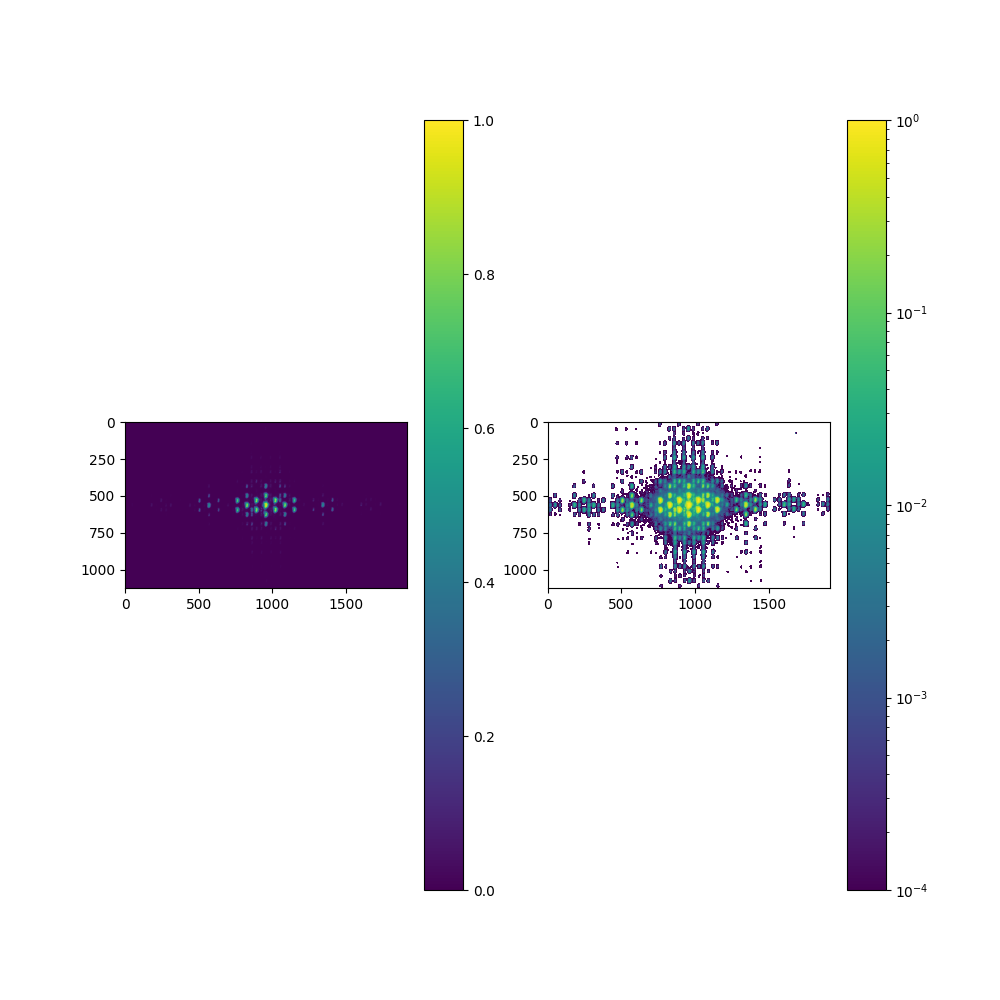

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mtplb
mtplb.rcParams.update(mtplb.rcParamsDefault)
import numpy as np
import scipy.misc
%matplotlib widget
# import mpld3
from PIL import Image
# mpld3.enable_notebook()

# folder = "E:/Pictures/lcd2_after/converted/"
folder = "/home/vsvintozelskyi/HDD/Pictures/lcd1_after/converted/"
#lcd1
factors = {
    "Img0042":	0.0250,
    # "Img0043":	0.0333,
    "Img0044":	0.0500,
    # "Img0045":	0.1000,
    "Img0046":	0.2000,
    # "Img0047":	0.4000,
    "Img0048":	0.6000,
    # "Img0049":	1.0000,
    "Img0050":	1.6000,
    # "Img0051":	2.5000,
    "Img0052":	3.0000,
    # "Img0053":	5.0000,
    "Img0054":	8.0000,
    # "Img0055":	13.0000,
    "Img0056":	15.0000,
    # "Img0057":	25.0000
}
#lcd 2
# factors = {
#     "Img0062":	1/80,
#     # "Img0063":	1/50,
#     "Img0064":	1/30,
#     # "Img0065":	1/20,
#     "Img0066":	1/13,
#     # "Img0067":	1/8,
#     "Img0068":	1/5,
#     # "Img0069":	0.333,
#     "Img0070":	0.625,
#     # "Img0071":	1,
#     "Img0072":	1.6,
#     # "Img0073":	2.5,
#     "Img0074":	4,
#     # "Img0075":	6,
#     "Img0076":	10.0000,
#     # "Img0077":	15.0000
#     "Img0078":	25.0000
# }

img = np.zeros_like(mpimg.imread("{}{}.nef.png".format(folder,list(factors.keys())[0])))
img = np.sum(img, axis=2)
resize_factor=2
img = np.array(Image.fromarray(img).resize((int(img.shape[1]/resize_factor),int(img.shape[0]/resize_factor))))
img *= 0
smart_round = lambda array: np.around((array - np.min(array)) / np.max(array - np.min(array)))
for file, factor in factors.items():
    newimg = mpimg.imread("{}{}.nef.png".format(folder,file))
    newimg = np.sum(newimg, axis=2)
    newimg = np.array(Image.fromarray(newimg).resize((int(newimg.shape[1]/resize_factor),int(newimg.shape[0]/resize_factor))))
    if not np.all(img == 0):
        newimg *= 1-smart_round(img)
    img = img + newimg / factor * smart_round(newimg)

img = img - np.min(img)
img = img / np.max(img)

# imgs = {
#     1: mpimg.imread('ipt/1.21/149_cm_650_nm_lcd1/converted/1.jpg'),
#     16: mpimg.imread('ipt/1.21/149_cm_650_nm_lcd1/converted/16.jpg'),
#     # 60: mpimg.imread('ipt/1.21/149_cm_650_nm_lcd1/converted/60.jpg'),
#     # 120: mpimg.imread('ipt/1.21/149_cm_650_nm_lcd1/converted/120.jpg'),
# }

# for factor, picture in imgs.items():
#     imgs[factor] = np.array(Image.fromarray(picture).resize((int(1750/2),int(1100/2))))

# img = np.zeros_like(np.sum(imgs[1], axis=2))
# for factor,picture in imgs.items():
#     img = img + np.sum(picture, axis=2) / factor
# img = mpimg.imread('E:/Pictures/lcd1_after/first_test.jpg')#[10:-10,10:-10]

# img = np.array(Image.fromarray(img).resize((int(img.shape[1]/4),int(img.shape[0]/4))))
# img = np.sum(img, axis=2)
print(img.shape)
# print(np.all(img >= 0))
# img=mpimg.imread('ipt/1.18/lcd1_122cm/test.jpg')
# img=mpimg.imread('ipt/1.21/149_cm_650_nm_lcd2/DSC_0522.jpg')
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10,10))
obj = ax[0].imshow(img)
plt.colorbar(obj, ax=ax[0])
obj = ax[1].imshow(img, norm=mtplb.colors.LogNorm(vmin=1e-4, vmax=np.max(img)))
# img = img[1100:1800, 1900:2600, :]
# imgplot = plt.imshow(img)

plt.colorbar(obj, ax=ax[1])
plt.show()

(1124, 1913)


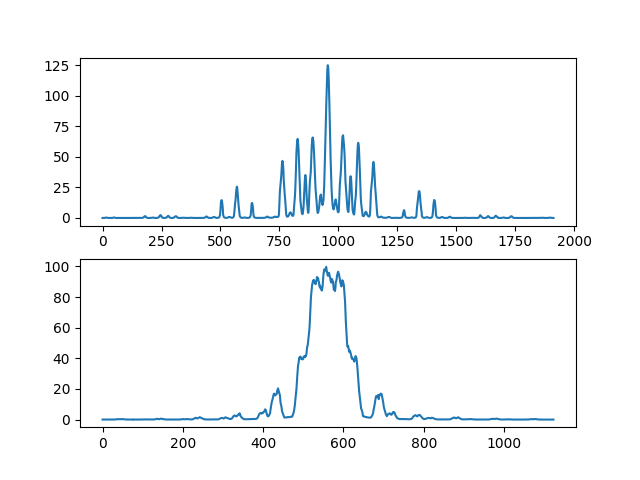

In [2]:
print(img.shape)
uniscale = img #np.sum(img, axis=2)
xsum = np.sum(uniscale, axis=0)
ysum = np.sum(uniscale, axis=1)
fig, ax = plt.subplots(2)
ax[0].plot(np.arange(xsum.shape[0]), xsum)
ax[1].plot(np.arange(ysum.shape[0]), ysum)
plt.show()

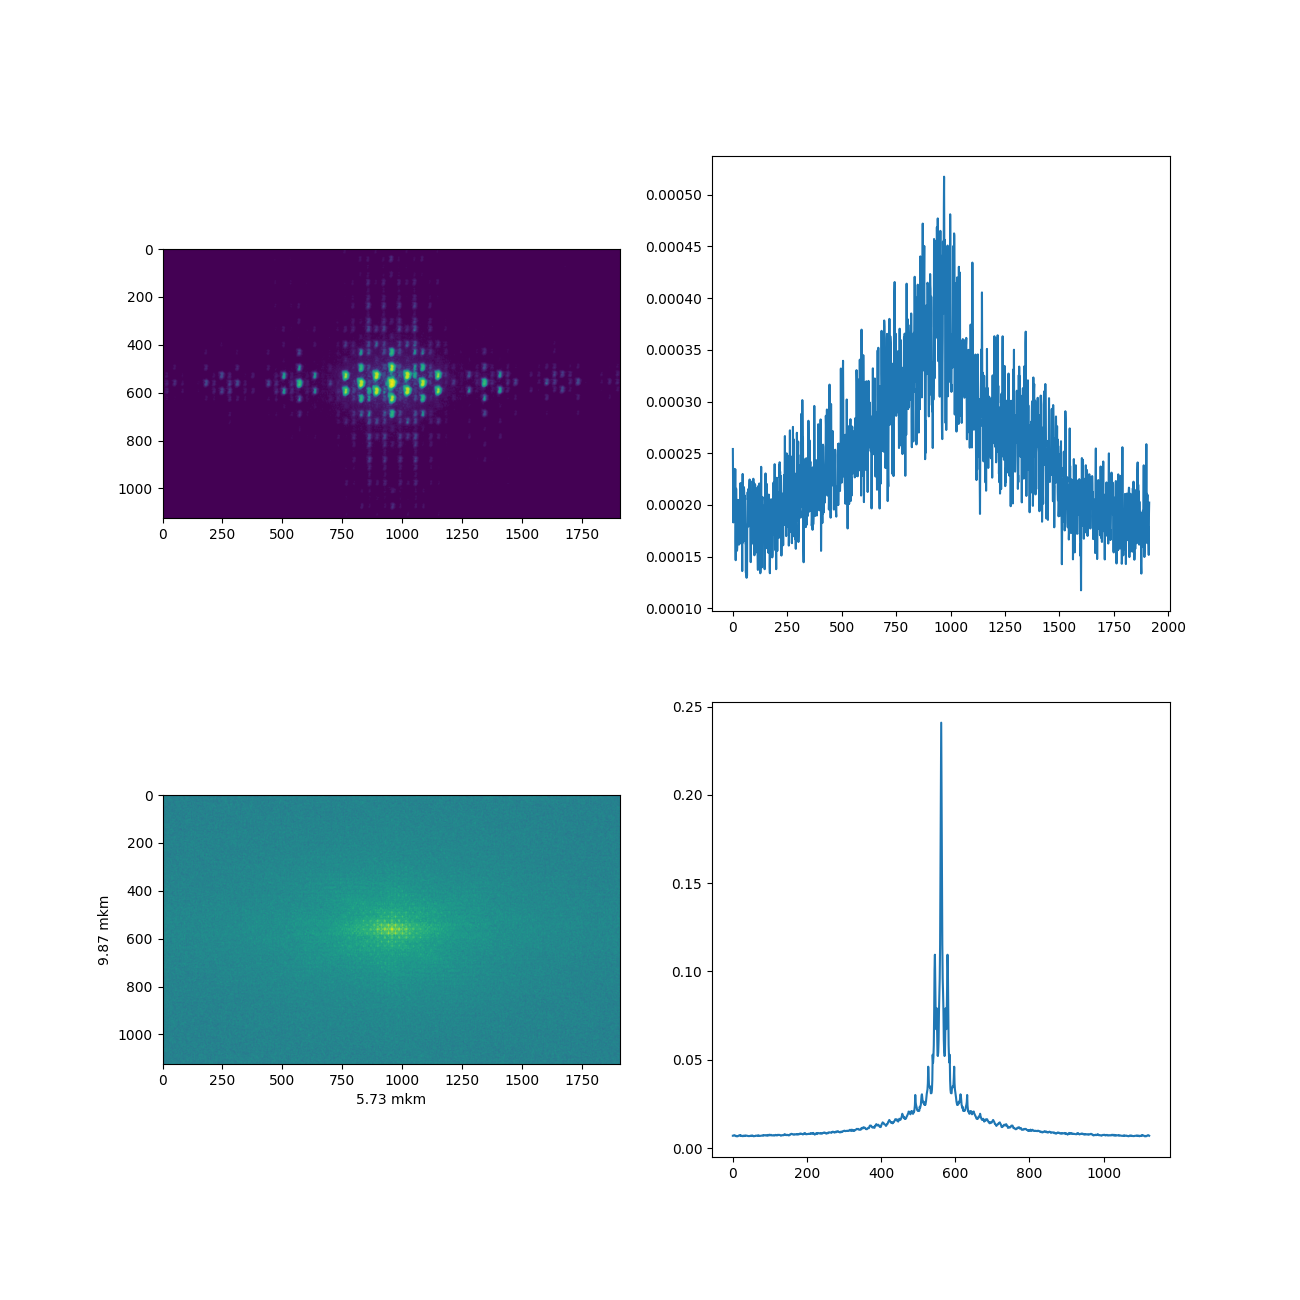

In [3]:
import matplotlib as mtplb
fig,ax = plt.subplots(2, 2,figsize=(13,13))
# cutted = uniscale[500:2000,1000:3000]
cutted = np.sqrt(uniscale)
# cutted = cutted /np.max(cutted)
# cutted = cutted * (cutted > 0.2)
reconstruction = np.abs( np.fft.fftshift( np.fft.ifft2(cutted)))
ax[0,0].imshow(cutted, interpolation=None)
ax[1,0].imshow(reconstruction, interpolation=None, norm=mtplb.colors.LogNorm(vmin=np.min(reconstruction), vmax=np.max(reconstruction)))
ax[1,0].set_xlabel("5.73 mkm")
ax[1,0].set_ylabel("9.87 mkm")
xsum = np.sum(reconstruction[280:330,:], axis=0)
ysum = np.sum(reconstruction, axis=1)
ax[0,1].plot(np.arange(xsum.shape[0]), xsum)
ax[1,1].plot(np.arange(ysum.shape[0]), ysum)
plt.show()

In [4]:
from hio import *
hio = HIO(cutted)
hio.grating = hio.grating * np.exp(2j*np.pi * np.random.uniform(size = hio.grating.shape))
reconstruction = np.fft.fftshift( hio.run(100,3))

100%|██████████| 3/3 [07:35<00:00, 151.97s/it]


In [5]:
# reconstruction = np.fft.fftshift( hio.run(1000))

(1124, 1913)


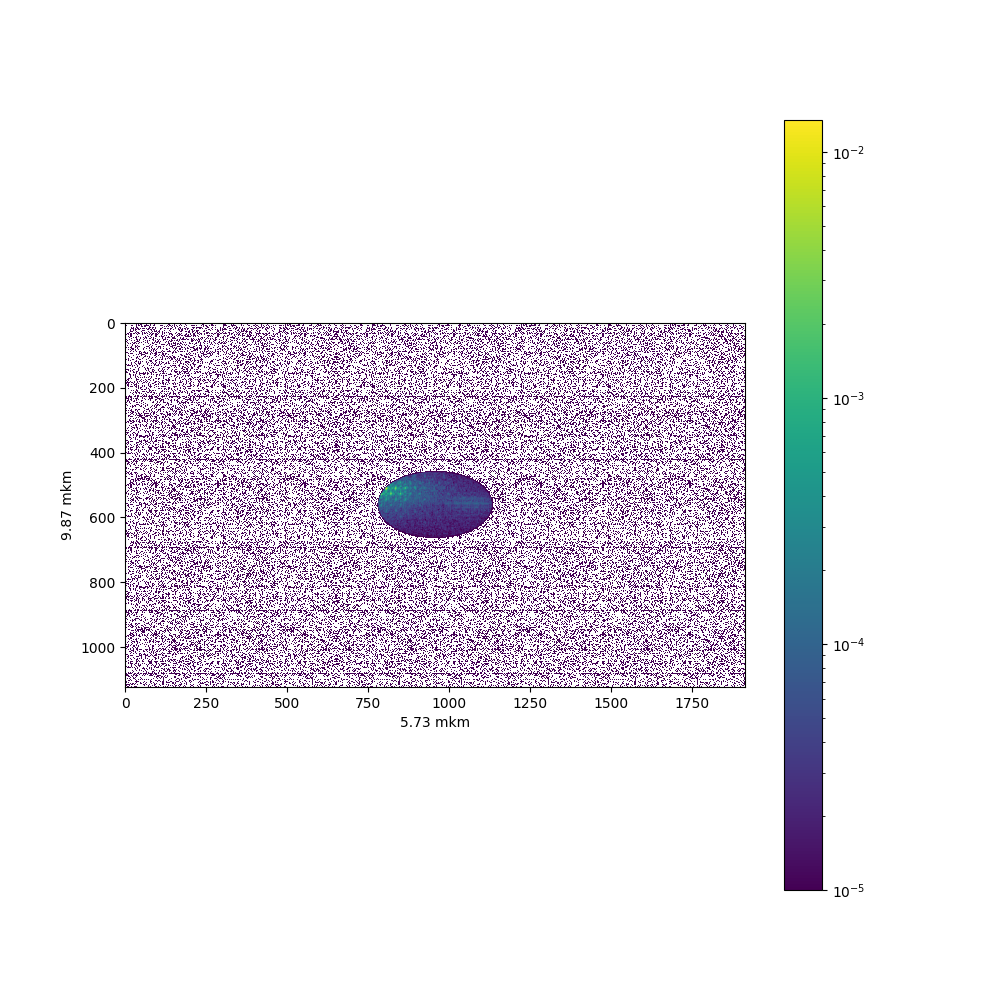

In [11]:
fig, ax = plt.subplots(1,figsize=(10,10))
obj = ax.imshow(np.absolute(np.fft.fftshift(reconstruction)), norm=mtplb.colors.LogNorm(vmin=np.min(1e-5), vmax=np.max(np.abs(reconstruction))))
plt.colorbar(obj, ax=ax)
ax.set_xlabel("5.73 mkm")
ax.set_ylabel("9.87 mkm")
print(reconstruction.shape)
# obj = ax[1].imshow(np.angle(reconstruction))
# plt.colorbar(obj, ax=ax[1])

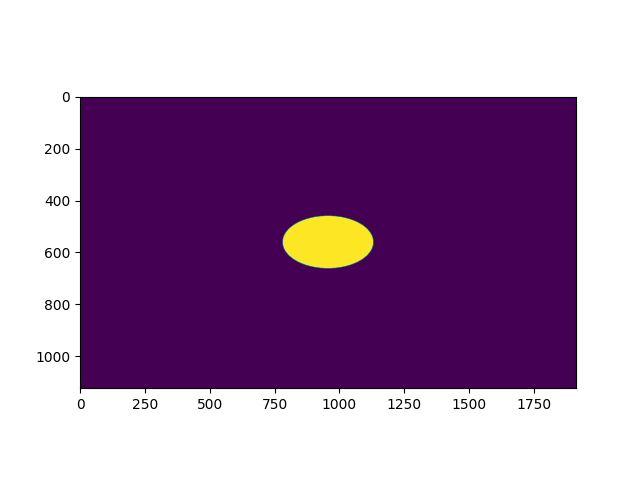

In [7]:
x0 = 0#reconstruction.shape[0]/2  # x center, half width                                       
y0 = 0#reconstruction.shape[1]/2 
b = 175
a = 101  # y center, half height                                      
x = np.linspace(-reconstruction.shape[0]/2, reconstruction.shape[0]/2, reconstruction.shape[0])  # x values of interest
y = np.linspace(-reconstruction.shape[1]/2, reconstruction.shape[1]/2, reconstruction.shape[1])[:,None]  # y values of interest, as a "column" array
ellipse = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
fig,ax = plt.subplots(1)
ax.imshow(hio.ellipse)#, extent=(x[0], x[-1], y[0], y[-1]))  # Plot

In [8]:
# plt.imsave("output.jpg",np.abs(reconstruction))
#np.save("reconstruction_lcd2",reconstruction)

In [9]:
# reconstruction = np.load("reconstruction.npy")
# # plt.imsave("./test.png",(np.log(np.abs(test)*10000)).astype(int)
# fig,ax = plt.subplots(nrows=1,ncols=2)
# obj = ax[0].imshow(np.abs(reconstruction)*10000)
# plt.colorbar(obj, ax=ax[0])
# ax[0].set_xlabel("5.73 mkm")
# ax[0].set_ylabel("9.87 mkm")
# obj = ax[1].imshow(np.abs(reconstruction)*10000, norm=mtplb.colors.LogNorm(vmin=np.min(np.abs(1e-1)), vmax=np.max(np.abs(reconstruction*10000))))
# plt.colorbar(obj, ax=ax[1])
# ax[1].set_xlabel("5.73 mkm")
# ax[1].set_ylabel("9.87 mkm")
# plt.show()

In [10]:
np.save("data",cutted)

In [ ]:
fig,ax = plt.subplots(1, 1)
imshow(reconstruction)